In [11]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [12]:
# Set pandas display options for better readability
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [13]:
base_path = '/Users/swathimanne/Documents/carrer_foundry/Final CF'

In [14]:
accidents_cleaned_file = 'Cleaned/Accident_Information_Cleaned.csv'
vehicles_cleaned_file = 'Cleaned/Vehicle_Information_Cleaned.csv'

In [16]:
# Importing Accidents cleaned csv
accidents_df = pd.read_csv(os.path.join(base_path, accidents_cleaned_file))

In [17]:
# Importing Vehicles cleaned csv
vehicles_df = pd.read_csv(os.path.join(base_path, vehicles_cleaned_file))

In [82]:
vehicles_df.columns

Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.', 'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway', 'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'model', 'Propulsion_Code', 'Sex_of_Driver', 'Skidding_and_Overturning', 'Towing_and_Articulation', 'Vehicle_Leaving_Carriageway', 'Vehicle_Location.Restricted_Lane', 'Vehicle_Manoeuvre', 'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive', '1st_Point_of_Impact', 'Year'], dtype='object')

In [18]:
accidents_df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Time_Category
0,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No,Afternoon Rush
1,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No,Night
2,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No,Office Hours
3,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No,Evening
4,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-11,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.515540,Daylight,Kensington and Chelsea,Kensington and Chelsea,524770.0,181160.0,-0.203238,E01002832,1,2,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No,Office Hours


In [19]:
vehicles_df.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,1st_Point_of_Impact,Year
0,200501BS00002,36 - 45,3.0,Data missing or out of range,NaN,8268.0,NaN,NaN,Journey as part of work,Leaving roundabout,DENNIS,NaN,Heavy oil,Male,NaN,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,200501BS00003,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,NaN,Journey as part of work,Not at or within 20 metres of junction,DENNIS,NaN,Heavy oil,Male,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
2,200501BS00004,46 - 55,4.0,Urban area,1.0,1769.0,NaN,NaN,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,ALMERA SE AUTO,Petrol,Female,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
3,200501BS00005,46 - 55,10.0,Data missing or out of range,NaN,85.0,Kerb,NaN,Other/Not known (2005-10),Not at or within 20 metres of junction,HONDA,NaN,Petrol,Male,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
4,200501BS00006,46 - 55,1.0,Urban area,4.0,2976.0,NaN,NaN,Other/Not known (2005-10),Not at or within 20 metres of junction,AUDI,A4 SPORT CABRIOLET AUTO,Petrol,Male,NaN,No tow/articulation,Did not leave carriageway,0.0,Moving off,1,Car,No,Did not impact,2005


##Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [30]:
accidents_df.shape

(1389623, 35)

In [31]:
accidents_df.columns

Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date', 'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Local_Authority_(Highway)', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'LSOA_of_Accident_Location', 'Number_of_Casualties', 'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Year', 'InScotland', 'Time_Category'], dtype='object')

In [46]:
# Dropping unneeded columns and creating data subset
accidents_sub = accidents_df.drop(['Accident_Index','Accident_Severity', '1st_Road_Class','2nd_Road_Class','Date','Day_of_Week','Junction_Control','Junction_Detail','Light_Conditions','Local_Authority_(District)', 'Local_Authority_(Highway)', 'LSOA_of_Accident_Location','Police_Force','Road_Type','Special_Conditions_at_Site','Carriageway_Hazards','Road_Surface_Conditions','Weather_Conditions','Time','Urban_or_Rural_Area','Year','InScotland','Time_Category'], axis = 1)

In [47]:
accidents_sub.head()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit
0,450.0,0.0,1.0,51.520075,524170.0,181650.0,-0.211708,1,1,0.0,5.0,30.0
1,0.0,0.0,1.0,51.525301,524520.0,182240.0,-0.206458,1,2,0.0,0.0,30.0
2,3220.0,0.0,1.0,51.482442,526900.0,177530.0,-0.173862,1,1,0.0,0.0,30.0
3,0.0,0.0,1.0,51.495752,528060.0,179040.0,-0.156618,1,1,0.0,0.0,30.0
4,0.0,0.0,1.0,51.515540,524770.0,181160.0,-0.203238,1,2,0.0,0.0,30.0


In [48]:

# Creating correlation table between variables
accidents_sub.corr()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit
1st_Road_Number,1.000000,0.185690,-0.000867,0.044465,-0.087882,0.043531,-0.085575,0.005612,-0.014955,0.002957,0.039361,-0.072647
2nd_Road_Number,0.185690,1.000000,0.021175,0.021616,-0.006589,0.020954,-0.005008,0.000017,0.012607,0.002724,0.096028,-0.049170
Did_Police_Officer_Attend_Scene_of_Accident,-0.000867,0.021175,1.000000,-0.008732,0.017861,-0.008835,0.018360,-0.097513,-0.045885,0.009403,0.007142,-0.141961
Latitude,0.044465,0.021616,-0.008732,1.000000,-0.421391,0.999973,-0.431898,0.030990,-0.034968,0.041814,-0.009074,0.049399
Location_Easting_OSGR,-0.087882,-0.006589,0.017861,-0.421391,1.000000,-0.419434,0.999354,-0.038865,0.012586,-0.026847,0.056955,-0.059999
Location_Northing_OSGR,0.043531,0.020954,-0.008835,0.999973,-0.419434,1.000000,-0.430043,0.030820,-0.035166,0.041867,-0.009183,0.049650
Longitude,-0.085575,-0.005008,0.018360,-0.431898,0.999354,-0.430043,1.000000,-0.037522,0.013771,-0.028053,0.055568,-0.059109
Number_of_Casualties,0.005612,0.000017,-0.097513,0.030990,-0.038865,0.030820,-0.037522,1.000000,0.244507,-0.006943,-0.027544,0.137064
Number_of_Vehicles,-0.014955,0.012607,-0.045885,-0.034968,0.012586,-0.035166,0.013771,0.244507,1.000000,-0.018310,-0.056580,0.109036
Pedestrian_Crossing-Human_Control,0.002957,0.002724,0.009403,0.041814,-0.026847,0.041867,-0.028053,-0.006943,-0.018310,1.000000,0.095818,-0.038592


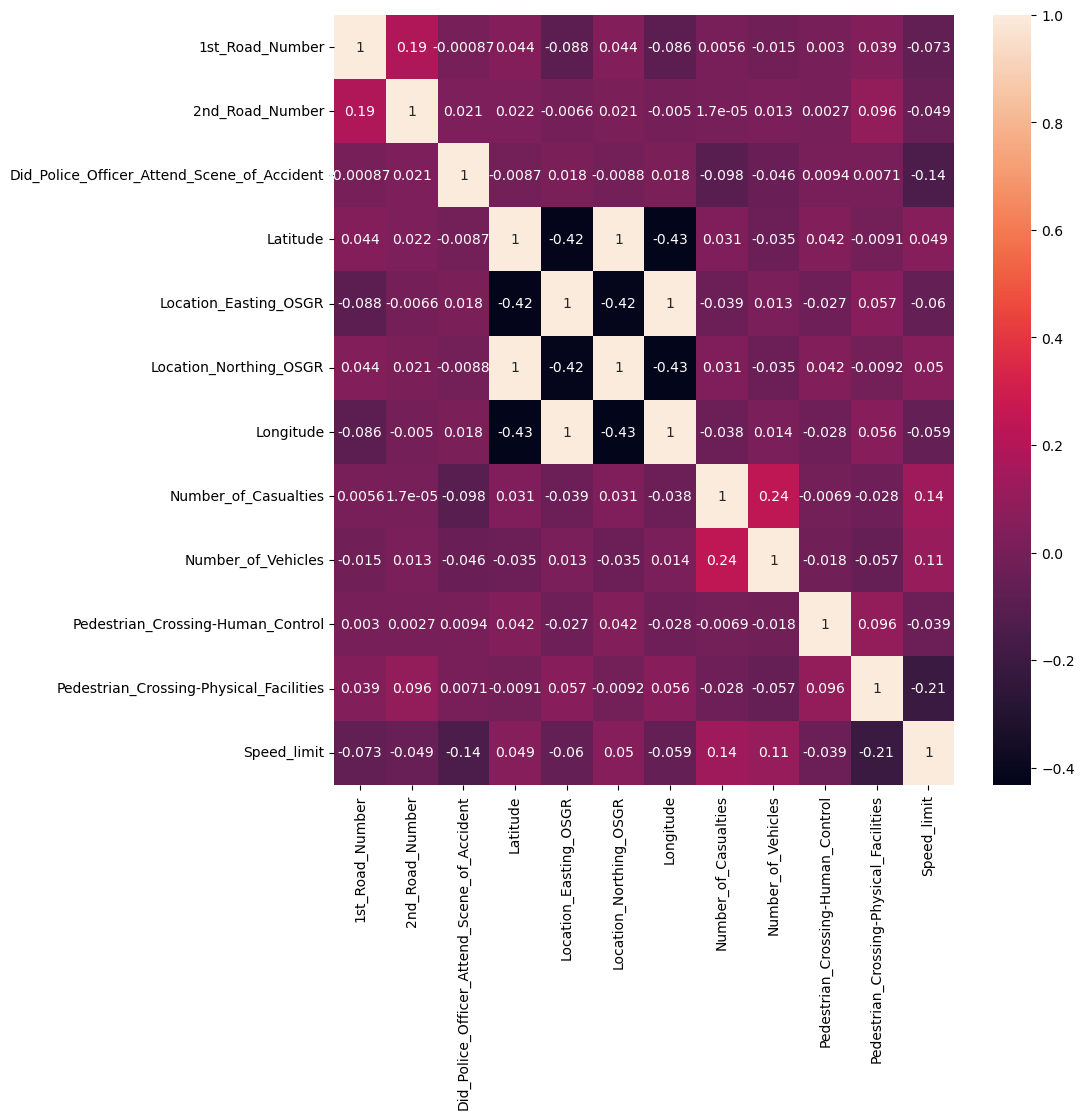

In [49]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating matrix heatmap using seaborn
corr = sns.heatmap(accidents_sub.corr(), annot = True, ax = ax)

##0: no relationship
0.1–0.3: weak relationship
0.3–0.5: moderate relationship
0.5–1.0: strong relationship
for exampleOn this scale we can number of casualities and number of vehicles have correlation of 0.24 which is a weak relation.As one variable increases, the other tends to decrease slightly, but the relationship is not strong.
When interpreting correlation coefficients, it's essential to remember that correlation does not imply causation. A high or low correlation between two variables doesn't necessarily mean that changes in one variable cause changes in the other. It only measures the strength and direction of their linear relationship. Further analysis is needed to establish causation or additional associations between variables.

In [68]:
##Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


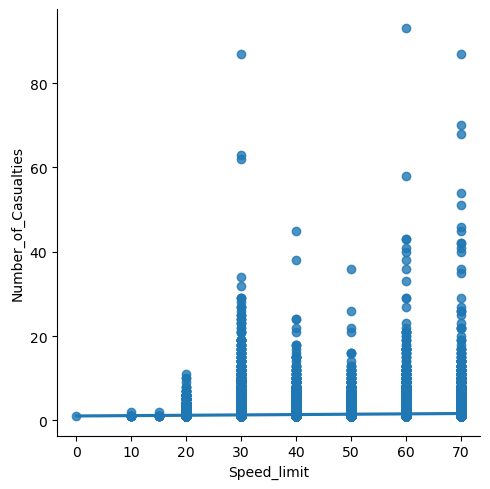

In [73]:
# Scatterplot of most correlated variables
# GDP per capita and happiness scatterplot
sns.lmplot(x = 'Speed_limit', y = 'Number_of_Casualties', data = accidents_df)

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


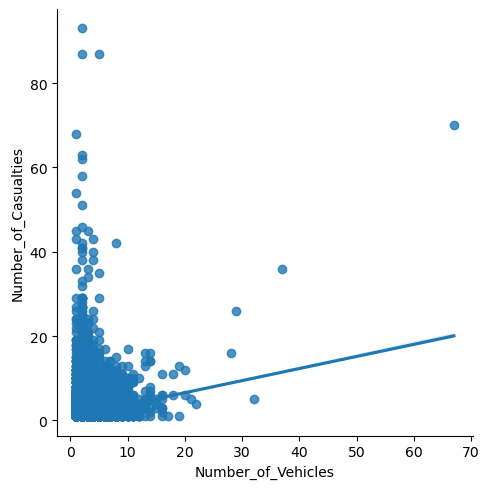

In [74]:
# Scatterplot of most correlated variables
# GDP per capita and happiness scatterplot
sns.lmplot(x = 'Number_of_Vehicles', y = 'Number_of_Casualties', data = accidents_df)

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


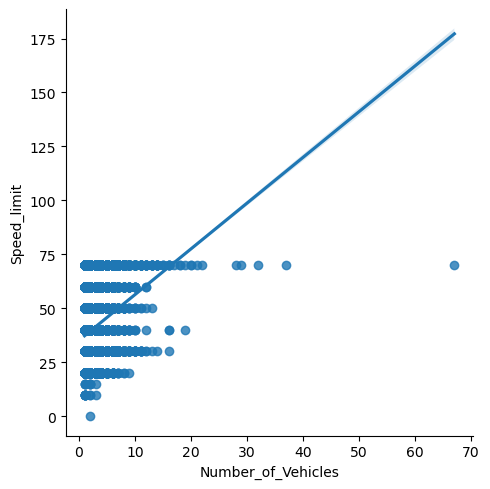

In [75]:
# Scatterplot of most correlated variables
# GDP per capita and happiness scatterplot
sns.lmplot(x = 'Number_of_Vehicles', y = 'Speed_limit', data = accidents_df)

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

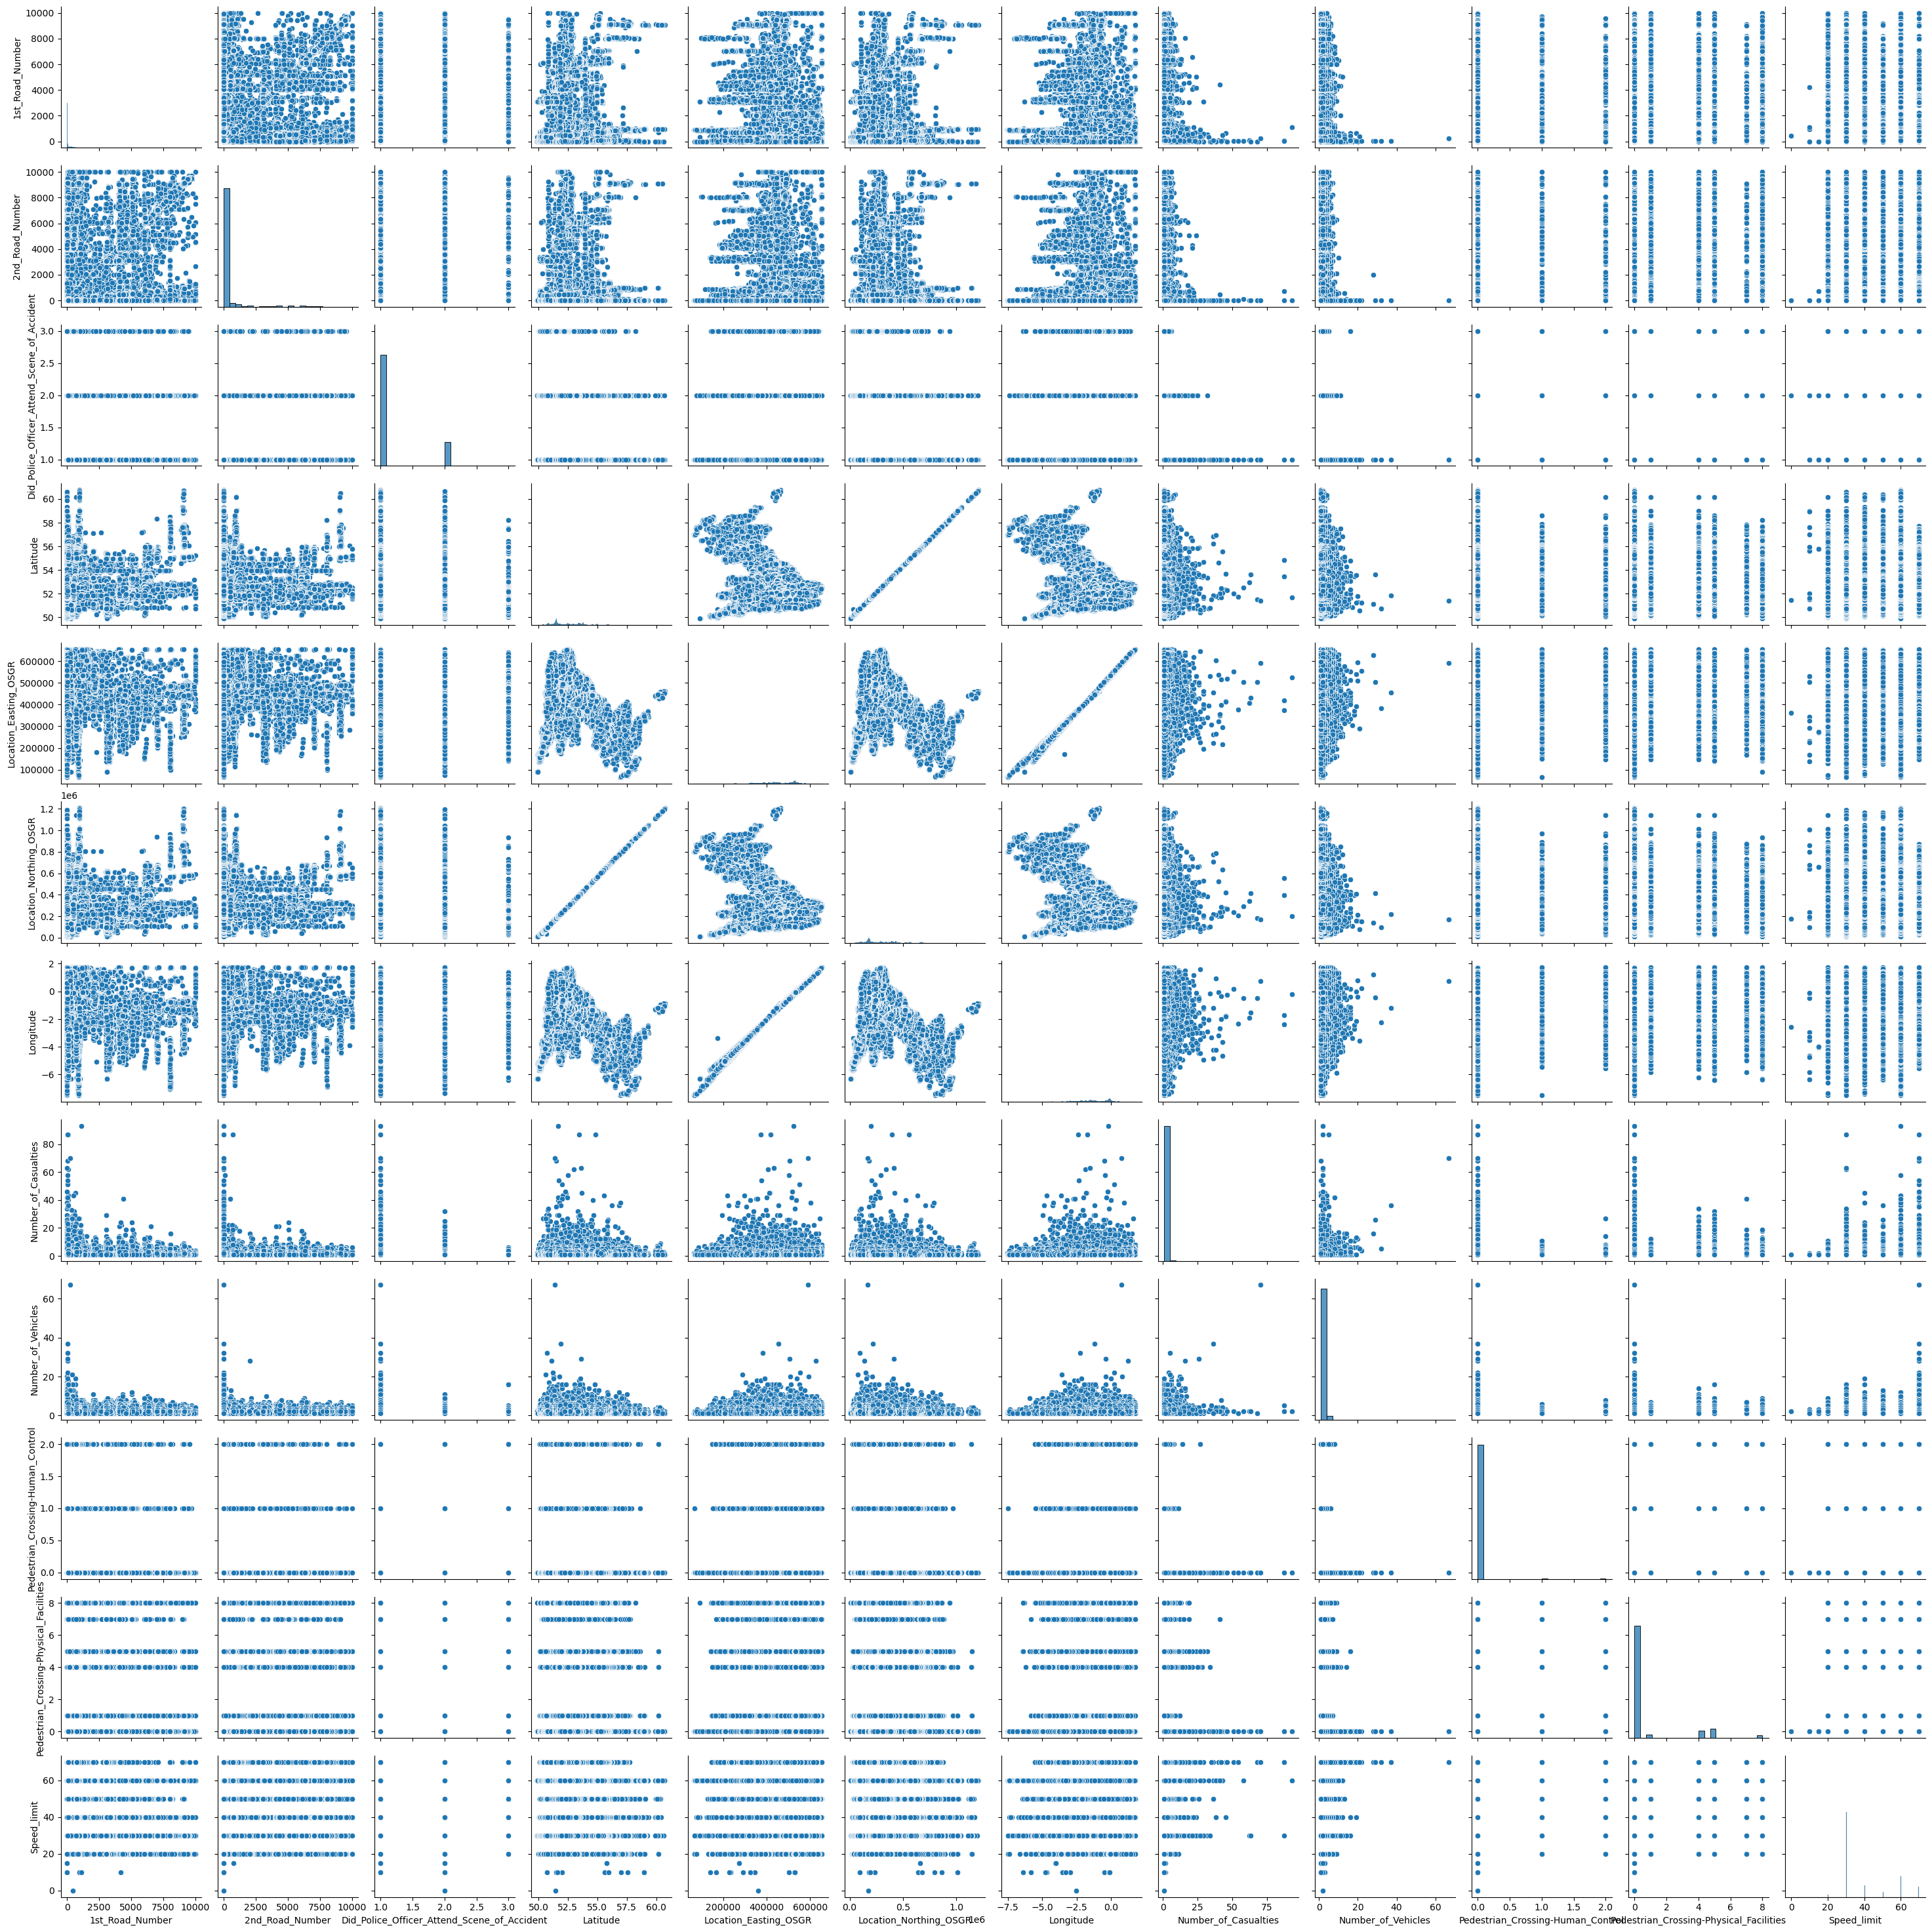

In [76]:
# Creating a pairplot
pair_plot = sns.pairplot(accidents_sub)

##The above scatterplots illustrate the strong correlations that we see between accidents, speed limit, number of casualities, and number of vehicles involved in the 1st and 2nd road numbers within the longitude and latitude.

# Creating Categorical plots for both dataframes 

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

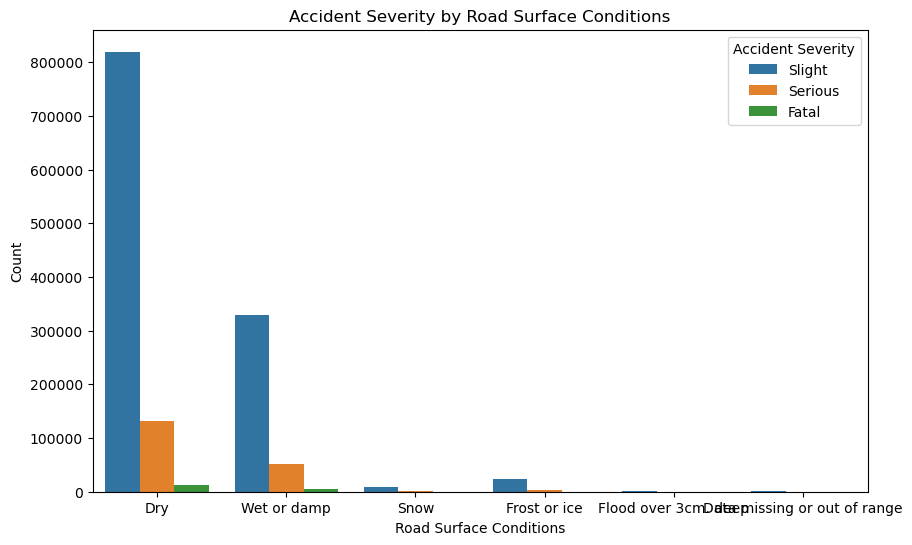

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_Surface_Conditions', hue='Accident_Severity', data=accidents_df)
plt.title('Accident Severity by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

Interpreting the results:

The plot displays the distribution of accident severity levels across various road surface conditions.
Observations we can see from the plot is that dry road surfacr conditions have the high rate of slight severity accidents when compared with the wet conditions of the road.
The stacked bars illustrate the proportion of each severity level within each road surface condition category.
For instance, if we observe that 'wet' road surface conditions have a higher proportion of 'fatal' accidents compared to snow or frost conditions, it might suggest that wet road surfaces could be more prone to severe accidents. 

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


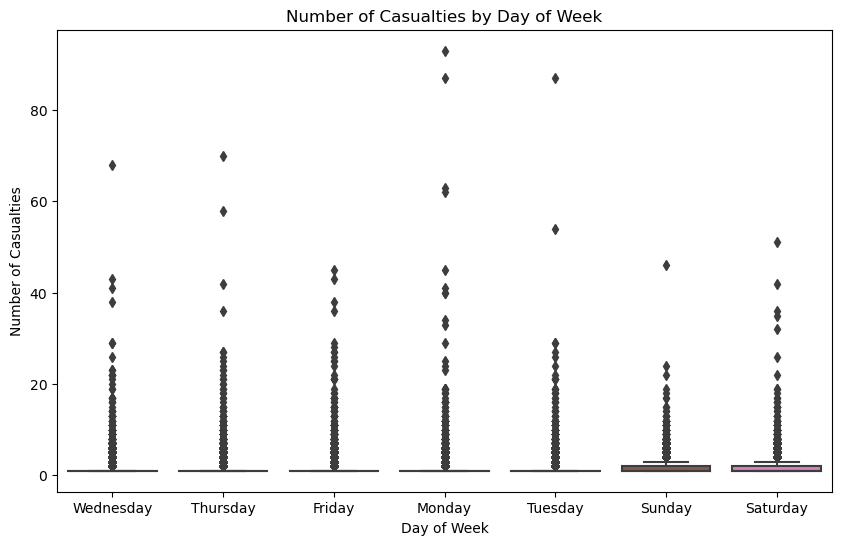

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_Week', y='Number_of_Casualties', data=accidents_df)
plt.title('Number of Casualties by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Casualties')
plt.show()

Interpreting the results:

The boxplot displays the distribution of the number of casualties across different days of the week.
The central line in each box represents the median number of casualties.
The box represents the interquartile range (IQR), showing where the middle 50% of the data lies.
The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the lower and upper quartiles, respectively.
Any points outside the whiskers are considered outliers.
Observations include:
The boxplot shows higher median casualty counts or wider ranges on weekends (Saturday and Sunday) compared to weekdays, it might suggest that accidents on weekends tend to result in more casualties or have a broader range of severity. To keep in mind that accidents numbers could be depending on traffic amount on particular day.

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

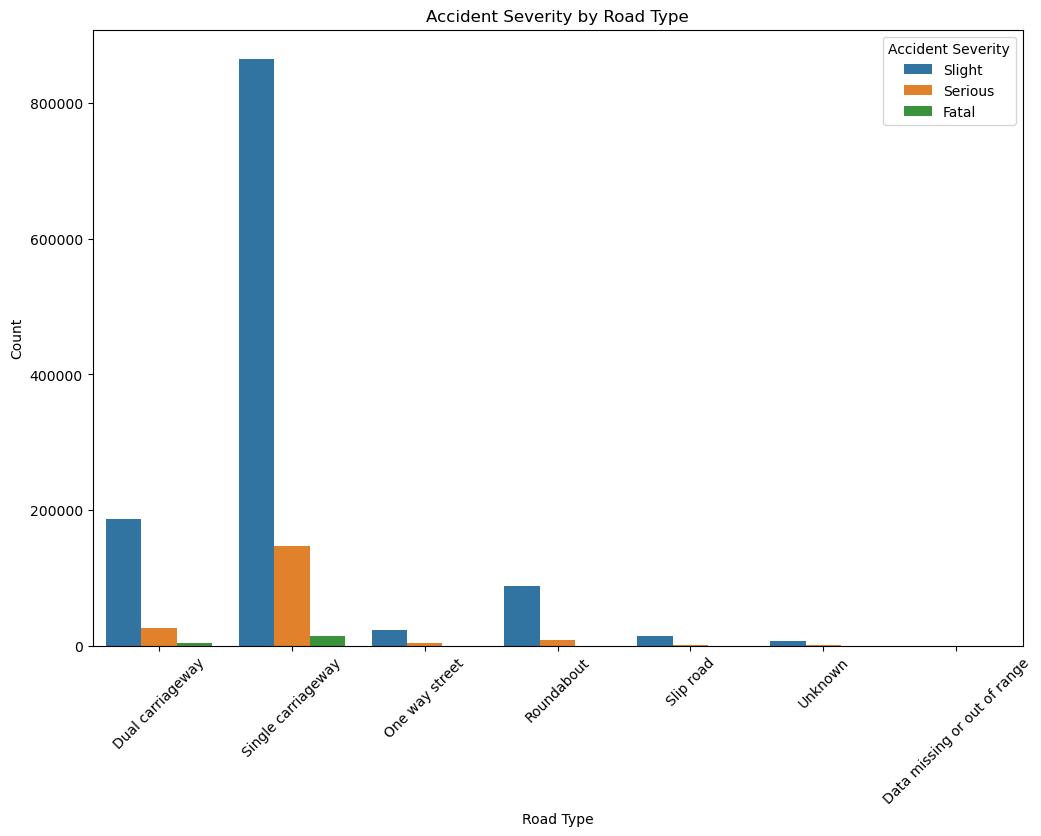

In [86]:
# Creating the count plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Road_Type', hue='Accident_Severity', data=accidents_df)
plt.title('Accident Severity by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

Interpreting the results:

This count plot visualizes the distribution of different accident severity levels based on the types of roads where accidents occurred.
Each bar represents the count of occurrences for each accident severity level within each road type category.
The legend indicates the various severity levels of accidents.
Observations might include:
Whether certain road types are associated with specific accident severity levels.
If there are differences in the distribution of accident severity among different road types.
The above plot illustrates that accidents on 'single carriageway roads' tend to have a higher count of severe accidents compared to 'dual carriageway roads'.
This visualization provides insights into the distribution of accident severity levels across different road types, allowing for observations on potential associations between road types and the severity of accidents occurring on them.

/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

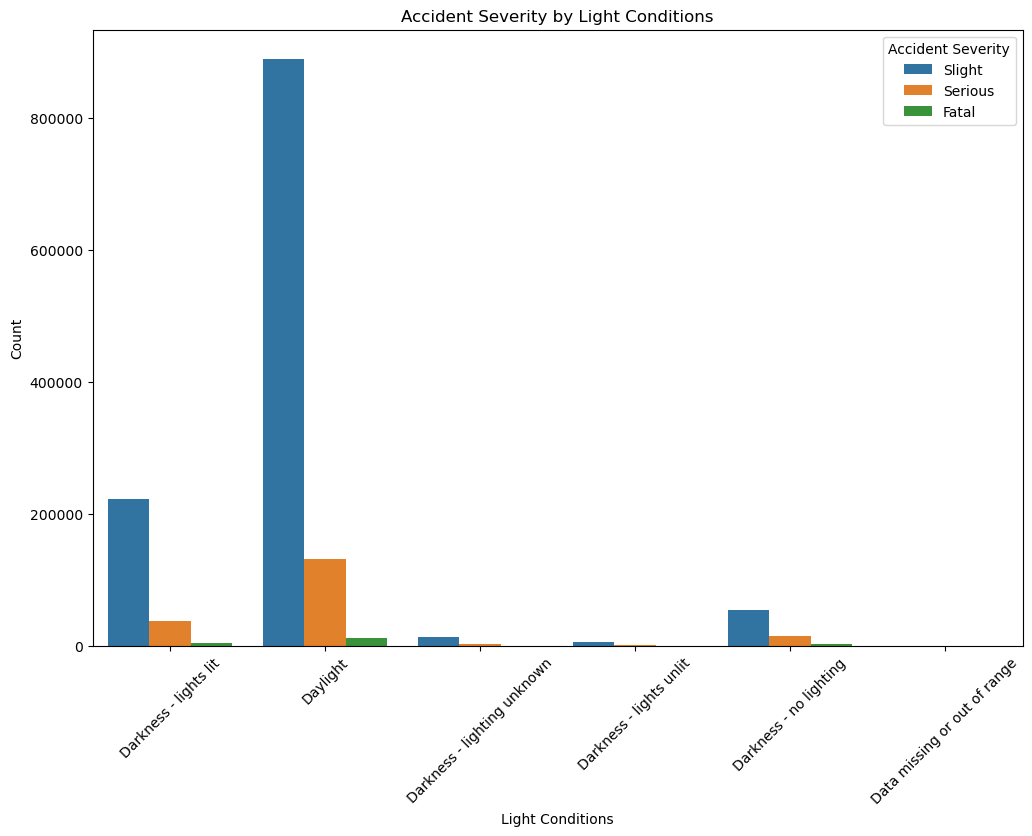

In [89]:
 ##Creating the count plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Light_Conditions', hue='Accident_Severity', data=accidents_df)
plt.title('Accident Severity by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

Interpreting the results:
This count plot visualizes the distribution of different accident severity levels based on varying light conditions at the time of accidents.
Each bar represents the count of occurrences for each accident severity level within each light condition category.
The legend indicates the various severity levels of accidents.

Observations might include:
Whether certain light conditions are associated with specific accident severity levels.
If there are differences in the distribution of accident severity among different light conditions.
we can see in the plot that accidents in 'day light' have a higher count of severe accidents compared to accidents in other conditions, but whereas in the darkness there are more percentage of serious and fatal accidents that shows the severity.


/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

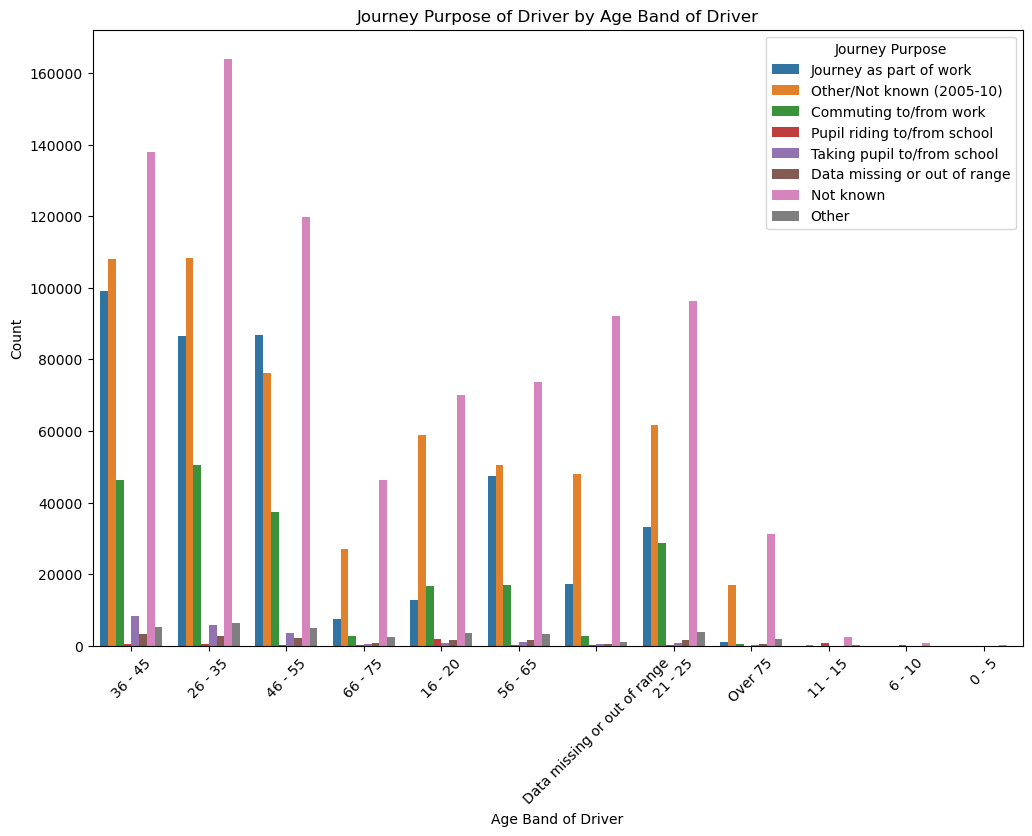

In [83]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Age_Band_of_Driver', hue='Journey_Purpose_of_Driver', data=vehicles_df)
plt.title('Journey Purpose of Driver by Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.legend(title='Journey Purpose')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

Interpreting the results:

This count plot visualizes the distribution of different journey purposes categorized by the age bands of drivers.
Each bar represents the count of occurrences for each journey purpose within each age band.
The legend indicates the various journey purposes.
Observations might include:
Whether specific journey purposes are more prevalent within certain age bands.
we can observe that the 'commuting to work' journey purpose is more prevalent among drivers in certain age bands compared to others, indicating potential age-related patterns in travel purposes.


/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/swathimanne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

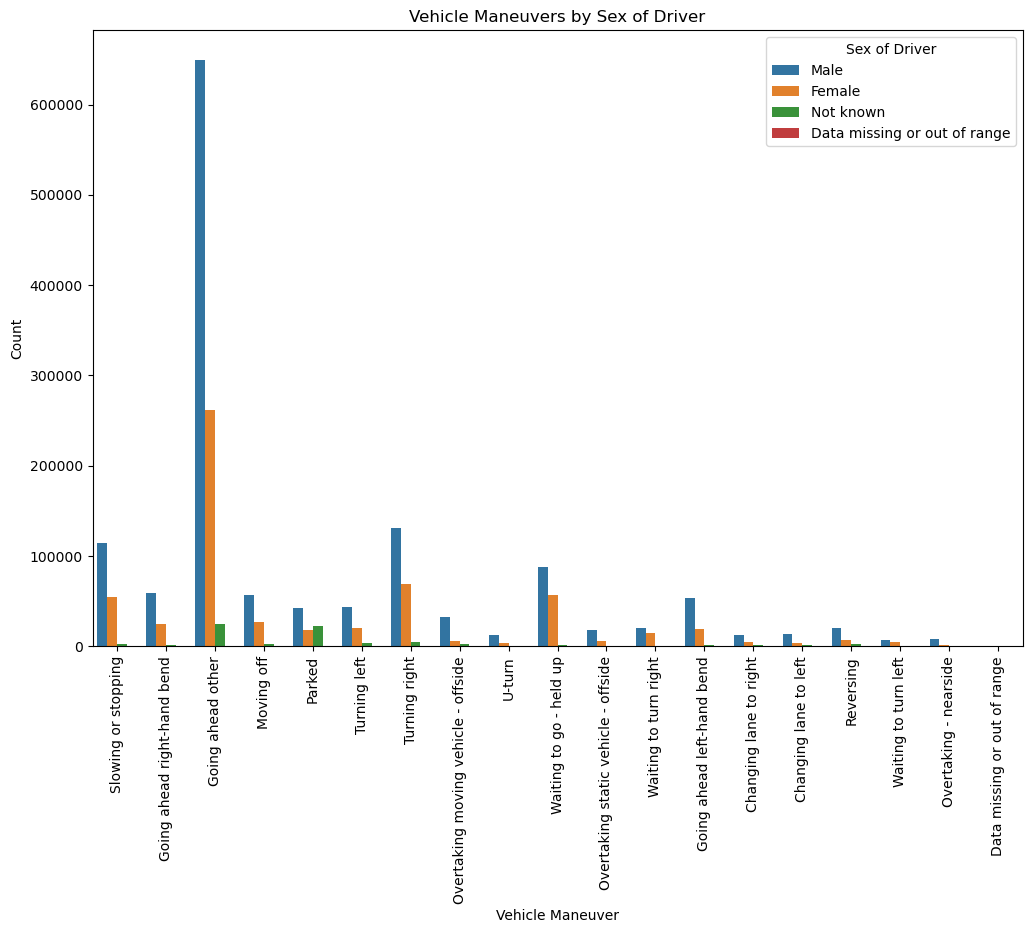

In [84]:
# Creating the count plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Vehicle_Manoeuvre', hue='Sex_of_Driver', data=vehicles_df)
plt.title('Vehicle Maneuvers by Sex of Driver')
plt.xlabel('Vehicle Maneuver')
plt.ylabel('Count')
plt.legend(title='Sex of Driver')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

Interpreting the results:
This count plot visualizes the distribution of different vehicle maneuvers based on the gender of the driver.
Each bar represents the count of occurrences for each vehicle maneuver within each gender category.
The legend indicates the various genders of drivers.
Observations might include:
Whether certain vehicle maneuvers are more frequent among drivers of a specific gender.
we might observe that certain vehicle maneuvers like 'going ahead other' or 'turning right' ,'slowing or stopping' are more prevalent among drivers of a particular gender likr male, indicating potential driving behavior differences.

# Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.
Define any hypotheses that you can at this point. You’ll be testing these later on.

After all Visual exploration  here are some new questions and hypotheses that follows:

Questions:
-Are certain vehicle types more prone to severe accidents in specific weather conditions or light conditions?
-Is there a correlation between road surface conditions and accident severity across different road types?
-Do specific age bands or sex of drivers exhibit different driving behaviors or purposes across different days of the week?
-Does the time of day correlate with the number of casualties in accidents on different road types?


Hypotheses to Test:
Null Hypothesis: The type of road surface conditions does not significantly impact the severity of accidents across different road types.

Alternate Hypothesis: Poor road surface conditions significantly contribute to increased severity levels of accidents, especially on single carriageways.

Null Hypothesis: There is no association between vehicle types and accident severity in adverse weather or low light conditions.

Alternate Hypothesis: Certain vehicle types, like motorcycles or bicycles, are more prone to severe accidents during adverse weather or low light conditions compared to other vehicle types.

These hypotheses and questions could serve as a foundation for further analysis and statistical testing to explore relationships, patterns, and potential contributing factors to accidents and their severity in the dataset.
